<a href="https://colab.research.google.com/github/Anitayea/DS111/blob/main/HW2_AnitaYe_yy3557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
#1
#a
a = np.array([1,1,2,4,5,6,7,18])
print("Mean: "+str(np.mean(a)))
print("Median: " +str(np.median(a)))
print("Standard Deviation: "+str(round(np.std(a),2)))

Mean: 5.5
Median: 4.5
Standard Deviation: 5.17


In [ ]:
#b
b = np.array([-100,1,2,4,5,6,7,18])
print("Mean: "+str(np.mean(b)))
print("Median: " +str(np.median(b)))
print("Standard Deviation: "+str(round(np.std(b),2)))

Mean: -7.125
Median: 4.5
Standard Deviation: 35.44


c) What do you notice about the relative robustness of these (mean and median) measures?

- Obviously, mean and standard deviation is much more easily shifted by one wrong or skewed data especially when the sample size is small like this one. Median stays rather stable, and will not be affected by extreme data points to large extent. As we can see from part b where we introduce a skewed data point, median stays the same, as it is rather robust because it measures the position of data instead of the actual value; while mean and standard deviation is largely affected: mean going to nagtive and standard deviation becomes around 7 times more, since both of them takes into account the values of all elements in the dataset. Although mean and standard deiviation is realtively less robust, we can check use this property to check your data. 

In [ ]:
#2
#a
def sampling(array, boolean):
    #we simply use the np.random.choice method and plug in the array, 
    #the length of the array and the boolean indicating with or without replacement
    return np.random.choice(array, len(array), boolean)
sampling(a,True)

array([ 7,  6, 18,  2,  5,  2,  1, 18])

In [ ]:
#b
# this function loops n times to get and print n samples of array a with or without replacement and their means
def multisample(n, boolean):
    for i in range(n):
        sample = sampling(a,boolean)
        print('Array: '+ str(sample))
        mean = np.mean(sample)
        print('The mean of the array above is '+ str(mean))
        print()

multisample(3, True)

Array: [ 5  6  7  2 18  7 18 18]
The mean of the array above is 10.125

Array: [18  5 18  5  1  5  5  2]
The mean of the array above is 7.375

Array: [ 5  5 18  1  2  1  6  6]
The mean of the array above is 5.5



In [ ]:
#c
# use the function in part b to sample witout replacement
multisample(3, False)

Array: [ 1 18  5  6  2  7  4  1]
The mean of the array above is 5.5

Array: [ 4  7 18  5  1  1  2  6]
The mean of the array above is 5.5

Array: [ 4  5  1  7  2 18  1  6]
The mean of the array above is 5.5



d)  What do you notice about the difference between sampling with replacement and without replacement?

- When sampling with replacement, the mean can diverge a lot since the numbers in the array can repeat themselves randomly, so the same number can appear multiple times, messing up the arrays. When sampling without replacement, the mean does not change since all the number are used once and only once. 

In [ ]:
#3
#a
#generate 11 random flips of heads and tails
faces = ['head','tail']
coin = np.random.choice(faces, size = 11)
coin

array(['tail', 'head', 'head', 'tail', 'tail', 'tail', 'head', 'tail',
       'tail', 'tail', 'head'], dtype='<U4')

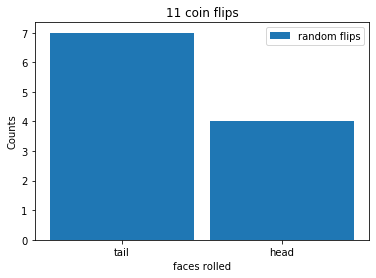

In [ ]:
# plot the 11 flips
plt.hist(coin, bins=[-.5, .5, 1.5], rwidth=.9, label = 'random flips')
plt.title('11 coin flips')
plt.xlabel('faces rolled')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [ ]:
#b: Of your 11 rolls, what proportion came up heads?
#This line returns the number of heads in the array and divide by total length, 11
heads = np.count_nonzero(coin=='head')
print(str(heads) +' heads appeared in a total of 11 flips, ')
proportion = heads/len(coin)
print('so the proportion is '+str(heads) +' / '+str(len(coin))+' which is approximately '+str(round(proportion,2)))

4 heads appeared in a total of 11 flips, 
so the proportion is 4 / 11 which is approximately 0.36


In [ ]:
#c
morecoins = np.random.choice(['head','tail'], size = 10000, p =[0.5,0.5])
print('The coin flips:')
morecoins

The coin flips:


array(['head', 'tail', 'head', ..., 'tail', 'head', 'head'], dtype='<U4')

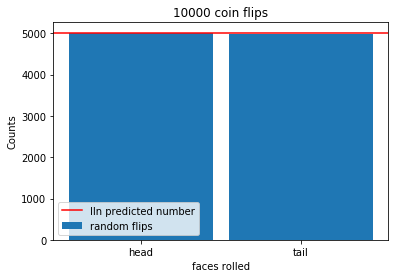

In [ ]:
# plot
plt.hist(morecoins, bins=[-.5, .5, 1.5], rwidth=.9, label='random flips')
plt.title('10000 coin flips')
plt.xlabel('faces rolled')
plt.ylabel('Counts')
# the proportion should be 1/2, so 10000*1/2 = 500 is the lln predicted number
plt.axhline(5000, color='red', label ='lln predicted number')
plt.legend()
plt.show()

In [ ]:
#4
#a
# This method randomly selects 100 panelists n times and returns the list that tracks the number of black members
def blackpanel(n):
    #use an array with zeros to keep track of the number of black members
    black = np.zeros(n)
    races = ['White','Hispanic','Black','Asian','Other']
    for i in range(n):
        rand = np.random.choice(races, 
                                size = 100, 
                                p =[0.48, 0.25, 0.13, 0.11, 0.03])
        options, counts = np.unique(rand, return_counts = True)
        #because options here sorts the original array with 'Black' on the second element, we use [1] for counts
        black[i] = counts[1]
    return black

In [ ]:
#b
black = blackpanel(5000)
black

array([16.,  9., 19., ..., 14., 19., 11.])

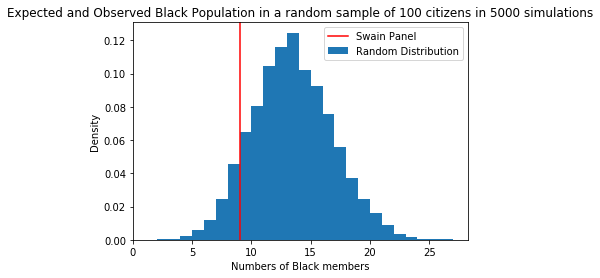

In [ ]:
# plot
plt.hist(black, bins = 25, 
         weights = np.ones(len(black))/len(black),
        label = 'Random Distribution')
plt.title('Expected and Observed Black Population in a random sample of 100 citizens in 5000 simulations')
plt.xlabel('Numbers of Black members')
plt.ylabel('Density')
plt.axvline(9, color='red', label = 'Swain Panel')
plt.xticks(np.arange(0,30,5))
plt.legend()
plt.show()

(c) From looking at your plot, how plausible do you find the claim that the Manhattan jury panel was drawn at random?
- From the 5000 simulation, it shows a normal bell-shaped curve that indicates a normal distribution at random. For the case with 9 black members, it is hard to determine given only one data, while even though it is not very close to the ideal mean count 13, it is fair enough to have 9 members to appear once in a while. Therefore, it is reasonable to say that it is drawn at random. 

(d) Estimate a p-value based on your simulated data. What is the probability of observing 9 or fewer Black panelists, assuming that the null hypothesis is true?

In [ ]:
p = len(np.where( black <=9)[0]) / len(black)
print('The p-value is '+str(p)+' based on the random model generated, therefore the probability of observing 9 or few members is '+str(p))
      

The p-value is 0.1554 based on the random model generated, therefore the probability of observing 9 or few members is 0.1554


(e) Based on this finding, would you reject or fail to reject the null hypothesis?
- The result fails to reject the null hypothesis because the p values is larger than 0.05, which means that it is not significant.   

(f) Imagine that we later learned this selection was not random—that lawyers had been intentionally trying to minimize the number of Black panelists. What type of error would we have made with regard to our decision about the null hypothesis?
- This is a type 2 error, as we did not reject this false null hypothesis. In this case, the number of black members actually does not indicate a random selection, and this false null hypothesis was not rejected earlier. Therefore, it is a type 2 error. 


In [ ]:
#5
df = pd.read_csv('horses.csv')
df.head()

,name,price,sex,height,color,location,markings,weight,foaldate,registrations,disciplines,temperament,link
0,Always Bar Time,18500.0,Gelding,16.1 hands,Brown,"Arthur, Ontario, Canada",NaN,1100 pounds,4-Mar,AQHA - American Quarter Horse Association (453...,Hunter Under Saddle (Champion) Equitation (Cha...,2,http://www.equine.com/horses-for-sale/horse-ad...
1,Sonny,1000.0,Gelding,14.2 hands,Bay,"Carbondale, Kansas",NaN,NaN,1-Jan,NaN,Youth/4-H Horse (Prospect) Trail Horse (Traine...,2,http://www.equine.com/horses-for-sale/horse-ad...
2,Norman,5800.0,Gelding,15.2 hands,Sorrel,"Hale, Michigan",3 white socks and a blaze,NaN,5-Apr,AQHA - American Quarter Horse Association (491...,Halter (Competed or Shown) Horsemanship (Compe...,3,http://www.equine.com/horses-for-sale/horse-ad...
3,Twist Kitty Chex,2000.0,Mare,NaN,Palomino,"Bloomfield, Nebraska",NaN,600 pounds,12-May,AQHA - American Quarter Horse Association (549...,Cutting (Prospect) Ranch Sorting (Prospect) Re...,1,http://www.equine.com/horses-for-sale/horse-ad...
4,Drews Approval,6500.0,Gelding,16.2 hands,Palomino,"Oglesby, Texas",NaN,1100 pounds,Apr-00,ApHC - Appaloosa Horse Club (617728),Showmanship (Competed or Shown) Youth/4-H Hors...,4,http://www.equine.com/horses-for-sale/horse-ad...


In [ ]:
#b
price = df['price'].tolist()

#number of observations is just the number of elements in the list
print('Number of observation: '+str(len(price)))
# record the realmean for later to draw line on the graph
realmean = np.mean(price)
# add zeros to reveal the rounded hidden zeros(not necessary)
print('Mean: '+str(round(realmean, 2))+'0')
print('Median: '+str(np.median(price)))
print('Standard Deviation: '+str(round(np.std(price),2)))

Number of observation: 1080
Mean: 7084.90
Median: 3350.0
Standard Deviation: 12690.62


In [ ]:
#c
sample = np.random.choice(price, size = 100, replace=True)
print('Mean: '+str(round(np.mean(sample), 2)))
print('Median: '+str(np.median(sample)))
print('Standard Deviation: '+str(round(np.std(sample),2)))

Mean: 8594.26
Median: 4000.0
Standard Deviation: 14684.32


In [ ]:
#d
#This function generates n samples and returns a list recording all their means 
def sampmean(n):
    means = np.zeros(n)
    for i in range(n):
        s = np.random.choice(price, size = 100)
        means[i] = np.mean(s)
    return means
#means for question d
dmean = sampmean(10)
dmean

array([6828.25, 4978.9 , 8857.25, 6814.  , 8317.09, 8596.  , 7556.  ,
       5455.75, 5355.01, 8127.  ])

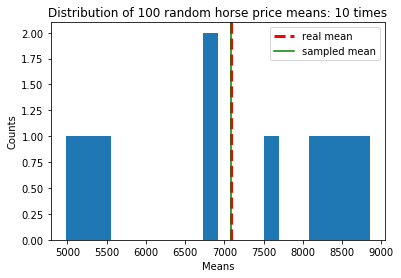

In [ ]:
#This function takes an array of means and plots the graph with a realmean and sampled mean
#Only works for this dataset in the question as the realmean was previously stored
def plotmean(mean):
    plt.hist(mean, bins = 20)
    plt.title('Distribution of 100 random horse price means: '+ str(len(mean))+' times')
    plt.xlabel('Means')
    plt.ylabel('Counts')
    plt.axvline(realmean, color='red', 
                label = "real mean", 
                ls = '--', lw=3)
    plt.axvline(np.mean(mean), color='green', 
                label = "sampled mean")
    plt.legend()
    plt.show()
    
plotmean(dmean)


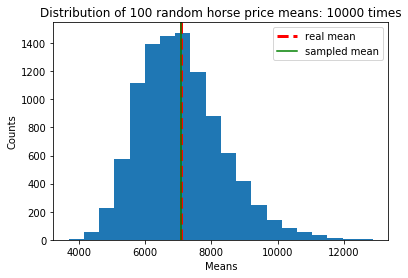

In [ ]:
#e
#means for question e, uses the functions written in part d
emean = sampmean(10000)
plotmean(emean)

(f) What do you notice about the mean of the sampling distribution as the number of samples increases?
- As the sample size increases, the observed mean gets closer and closer to the theoretical mean because of the law of large numbers. 

(g) What do you notice about the shape of the sampling distribution as the number of samples increases?

- The shape becomes closer to a bell-shaped curve as the sample size grow, which means that it gets closer to looking like a normal distribution.

(h) What principle predicts the outcomes you see regarding the mean of the sampling distribution as the number of samples increases?

- Law of large number 

(i) What principle predicts the outcomes you see regarding the shape of the sampling distribution as the number of samples increases?

- Central limit theorem